In [1]:
import contextily as ctx
import geopandas as gpd
import matplotlib.patches as patches
from shapely import wkt

from climada.util.plot import add_basemap

def plot_salvador_ma():
    risk_shape = 'POLYGON ((-89.25090785340315 13.671, -89.251 13.671, -89.251 13.67108933717579, -89.251 13.67117867435158, -89.251 13.67126801152738, -89.251 13.67135734870317, -89.251 13.67144668587896, -89.251 13.67153602305475, -89.251 13.67162536023055, -89.251 13.67171469740634, -89.251 13.67180403458213, -89.251 13.67189337175792, -89.251 13.67198270893372, -89.251 13.67207204610951, -89.251 13.6721613832853, -89.251 13.6722507204611, -89.251 13.67234005763689, -89.251 13.67242939481268, -89.251 13.67251873198847, -89.251 13.67260806916426, -89.251 13.67269740634006, -89.251 13.67278674351585, -89.251 13.67287608069164, -89.251 13.67296541786743, -89.251 13.67305475504323, -89.251 13.67314409221902, -89.251 13.67323342939481, -89.251 13.6733227665706, -89.251 13.6734121037464, -89.251 13.67350144092219, -89.251 13.67359077809798, -89.251 13.67368011527378, -89.251 13.67376945244957, -89.251 13.67385878962536, -89.251 13.67394812680115, -89.251 13.67403746397694, -89.251 13.67412680115274, -89.251 13.67421613832853, -89.251 13.67430547550432, -89.251 13.67439481268011, -89.251 13.67448414985591, -89.251 13.6745734870317, -89.251 13.67466282420749, -89.251 13.67475216138329, -89.251 13.67484149855908, -89.251 13.67493083573487, -89.251 13.67502017291066, -89.251 13.67510951008645, -89.251 13.67519884726225, -89.251 13.67528818443804, -89.251 13.67537752161383, -89.251 13.67546685878962, -89.251 13.67555619596542, -89.251 13.67564553314121, -89.251 13.675734870317, -89.251 13.67582420749279, -89.251 13.67591354466859, -89.251 13.67600288184438, -89.251 13.67609221902017, -89.251 13.67618155619597, -89.251 13.67627089337176, -89.251 13.67636023054755, -89.251 13.67644956772334, -89.251 13.67653890489913, -89.251 13.67662824207493, -89.251 13.67671757925072, -89.251 13.67680691642651, -89.251 13.6768962536023, -89.251 13.6769855907781, -89.251 13.67707492795389, -89.251 13.67716426512968, -89.251 13.67725360230548, -89.251 13.67734293948127, -89.251 13.67743227665706, -89.251 13.67752161383285, -89.251 13.67761095100865, -89.251 13.67770028818444, -89.251 13.67778962536023, -89.251 13.67787896253602, -89.251 13.67796829971181, -89.251 13.67805763688761, -89.25090785340315 13.67832564841498, -89.25081570680629 13.67850432276657, -89.25072356020942 13.67868299711816, -89.25063141361257 13.67886167146974, -89.250354973822 13.67921902017291, -89.25017068062827 13.67948703170029, -89.2498942408377 13.67984438040346, -89.24961780104712 13.68020172910663, -89.24934136125655 13.6805590778098, -89.24915706806283 13.68082708933717, -89.24888062827226 13.68118443804035, -89.24860418848168 13.68154178674352, -89.24832774869111 13.68189913544669, -89.24814345549738 13.68216714697406, -89.24786701570682 13.68252449567723, -89.24759057591623 13.6828818443804, -89.24740628272252 13.68314985590778, -89.24712984293194 13.68350720461095, -89.24685340314137 13.68386455331412, -89.24657696335079 13.68422190201729, -89.24639267015708 13.68448991354467, -89.24556335078535 13.68556195965418, -89.24510261780105 13.68609798270893, -89.2450104712042 13.68618731988473, -89.24491832460734 13.68627665706052, -89.24436544502618 13.68690201729107, -89.24427329842932 13.68699135446686, -89.24372041884817 13.68761671469741, -89.24362827225131 13.6877060518732, -89.24353612565446 13.68779538904899, -89.24298324607331 13.68842074927954, -89.24289109947644 13.68851008645533, -89.24233821989529 13.68913544668588, -89.24224607329843 13.68922478386167, -89.24169319371728 13.68985014409222, -89.24160104712043 13.68993948126801, -89.24150890052357 13.6900288184438, -89.24095602094241 13.69065417867435, -89.24086387434555 13.69074351585014, -89.24077172774869 13.69083285302594, -89.24067958115184 13.69092219020173, -89.24058743455498 13.69101152737752, -89.24049528795813 13.69110086455331, -89.24040314136126 13.69119020172911, -89.2403109947644 13.6912795389049, -89.24021884816754 13.69136887608069, -89.23975811518325 13.69163688760807, -89.23929738219896 13.69190489913545, -89.23865235602095 13.69226224783862, -89.23819162303666 13.69253025936599, -89.23773089005236 13.69279827089337, -89.23708586387436 13.69315561959654, -89.23662513089006 13.69342363112392, -89.23616439790577 13.6936916426513, -89.23570366492147 13.69395965417867, -89.23505863874345 13.69431700288184, -89.23459790575916 13.69458501440922, -89.23413717277488 13.6948530259366, -89.23376858638744 13.69494236311239, -89.23321570680629 13.69503170028818, -89.23266282722513 13.69512103746398, -89.23220209424085 13.69521037463977, -89.23164921465968 13.69529971181556, -89.23109633507853 13.69538904899135, -89.23054345549738 13.69547838616715, -89.23008272251309 13.69556772334294, -89.22952984293194 13.69565706051873, -89.22897696335079 13.69574639769452, -89.22851623036649 13.69583573487032, -89.22741047120419 13.6960144092219, -89.22685759162304 13.69610374639769, -89.22621256544502 13.69619308357349, -89.22612041884817 13.69619308357349, -89.22602827225131 13.69619308357349, -89.22593612565446 13.69619308357349, -89.2258439790576 13.69619308357349, -89.22575183246073 13.69619308357349, -89.22565968586387 13.69619308357349, -89.22556753926702 13.69619308357349, -89.22547539267016 13.69619308357349, -89.22538324607331 13.69619308357349, -89.22529109947644 13.69619308357349, -89.22519895287958 13.69619308357349, -89.22510680628272 13.69619308357349, -89.22501465968587 13.69619308357349, -89.22492251308901 13.69619308357349, -89.22483036649214 13.69619308357349, -89.22473821989529 13.69619308357349, -89.22464607329843 13.69619308357349, -89.22455392670157 13.69619308357349, -89.22446178010472 13.69619308357349, -89.22436963350786 13.69619308357349, -89.22427748691099 13.69619308357349, -89.22418534031414 13.69619308357349, -89.22409319371728 13.69619308357349, -89.22400104712042 13.69619308357349, -89.22390890052357 13.69619308357349, -89.2238167539267 13.69619308357349, -89.22372460732984 13.69619308357349, -89.22363246073299 13.69619308357349, -89.22354031413613 13.69619308357349, -89.22344816753927 13.69619308357349, -89.2233560209424 13.69619308357349, -89.22326387434555 13.69619308357349, -89.22317172774869 13.69619308357349, -89.2222502617801 13.69628242074928, -89.22215811518325 13.69628242074928, -89.22206596858639 13.69628242074928, -89.22197382198954 13.69628242074928, -89.22188167539267 13.69628242074928, -89.22178952879581 13.69628242074928, -89.22169738219895 13.69628242074928, -89.2216052356021 13.69628242074928, -89.22151308900524 13.69628242074928, -89.22142094240837 13.69628242074928, -89.22132879581152 13.69628242074928, -89.22123664921466 13.69628242074928, -89.2211445026178 13.69628242074928, -89.22105235602095 13.69628242074928, -89.22096020942409 13.69628242074928, -89.22086806282722 13.69628242074928, -89.22077591623037 13.69628242074928, -89.22059162303665 13.69619308357349, -89.22031518324607 13.6960144092219, -89.21985445026178 13.69574639769452, -89.21957801047121 13.69556772334294, -89.21930157068063 13.69538904899135, -89.21902513089006 13.69521037463977, -89.21874869109948 13.69503170028818, -89.21828795811518 13.69476368876081, -89.21801151832462 13.69458501440922, -89.21773507853403 13.69440634005764, -89.21745863874345 13.69422766570605, -89.21699790575916 13.69395965417867, -89.21672146596859 13.69378097982709, -89.21644502617801 13.6936023054755, -89.21616858638744 13.69342363112392, -89.21589214659686 13.69324495677233, -89.21543141361256 13.69297694524496, -89.215154973822 13.69279827089337, -89.21091623036649 13.69226224783862, -89.21063979057591 13.69235158501441, -89.21036335078534 13.6924409221902, -89.21008691099476 13.69253025936599, -89.20981047120419 13.69261959654179, -89.2093497382199 13.69279827089337, -89.20907329842932 13.69288760806916, -89.20879685863875 13.69297694524496, -89.20852041884817 13.69306628242075, -89.2082439790576 13.69315561959654, -89.20815183246073 13.69315561959654, -89.20805968586387 13.69315561959654, -89.20796753926702 13.69315561959654, -89.20787539267016 13.69315561959654, -89.2077832460733 13.69315561959654, -89.20769109947643 13.69315561959654, -89.20695392670157 13.69306628242075, -89.20630890052357 13.69297694524496, -89.20557172774869 13.69288760806916, -89.20492670157068 13.69279827089337, -89.20418952879581 13.69270893371758, -89.2035445026178 13.69261959654179, -89.20280732984293 13.69253025936599, -89.19976649214659 13.69288760806916, -89.19912146596859 13.69315561959654, -89.19847643979058 13.69342363112392, -89.19829214659686 13.69351296829971, -89.19764712041885 13.69378097982709, -89.19700209424084 13.69404899135447, -89.19681780104712 13.69413832853026, -89.19617277486911 13.69440634005764, -89.19552774869111 13.69467435158501, -89.19534345549738 13.69476368876081, -89.19469842931937 13.69503170028818, -89.19405340314137 13.69529971181556, -89.19386910994764 13.69538904899135, -89.19322408376964 13.69565706051873, -89.19303979057591 13.69574639769452, -89.1923947643979 13.6960144092219, -89.1917497382199 13.69628242074928, -89.19156544502617 13.69637175792507, -89.19092041884817 13.69663976945245, -89.19027539267016 13.69690778097983, -89.19009109947643 13.69699711815562, -89.18944607329843 13.697265129683, -89.18880104712042 13.69753314121037, -89.18861675392669 13.69762247838617, -89.18797172774869 13.69789048991355, -89.18732670157068 13.69815850144092, -89.18714240837696 13.69824783861671, -89.18668167539266 13.6984265129683, -89.18658952879581 13.6984265129683, -89.18649738219895 13.6984265129683, -89.18640523560209 13.6984265129683, -89.18631308900524 13.6984265129683, -89.18566806282722 13.69815850144092, -89.18502303664921 13.69789048991355, -89.18456230366492 13.69771181556196, -89.18391727748691 13.69744380403458, -89.18327225130889 13.6971757925072, -89.18262722513089 13.69690778097983, -89.1790335078534 13.69672910662824, -89.17875706806282 13.69681844380403, -89.17848062827225 13.69690778097983, -89.17820418848167 13.69699711815562, -89.1779277486911 13.69708645533141, -89.17765130890052 13.6971757925072, -89.17700628272252 13.69735446685879, -89.17672984293193 13.69744380403458, -89.17645340314137 13.69753314121037, -89.17617696335078 13.69762247838617, -89.1759005235602 13.69771181556196, -89.17562408376963 13.69780115273775, -89.17534764397905 13.69789048991355, -89.17470261780105 13.69806916426513, -89.1725832460733 13.69931988472622, -89.17249109947643 13.69940922190202, -89.17193821989528 13.70003458213256, -89.17184607329843 13.70012391930836, -89.17175392670157 13.70021325648415, -89.17120104712042 13.7008386167147, -89.17110890052356 13.70092795389049, -89.17101675392669 13.70101729106628, -89.17092460732984 13.70110662824207, -89.17037172774869 13.70173198847262, -89.17027958115183 13.70182132564842, -89.17018743455498 13.70191066282421, -89.17009528795812 13.702, -89.17000314136125 13.702, -89.16991099476439 13.702, -89.16981884816754 13.702, -89.16972670157068 13.702, -89.16963455497383 13.702, -89.16954240837696 13.702, -89.1694502617801 13.702, -89.16935811518324 13.702, -89.16926596858639 13.702, -89.16917382198953 13.702, -89.16908167539266 13.702, -89.16898952879581 13.702, -89.16889738219895 13.702, -89.16880523560209 13.702, -89.16871308900524 13.702, -89.16862094240837 13.702, -89.16852879581151 13.702, -89.16843664921466 13.702, -89.1683445026178 13.702, -89.16825235602094 13.702, -89.16816020942409 13.702, -89.16806806282722 13.702, -89.16797591623036 13.702, -89.16788376963351 13.702, -89.16779162303665 13.702, -89.16769947643979 13.702, -89.16760732984292 13.702, -89.16751518324607 13.702, -89.16742303664921 13.702, -89.16733089005236 13.702, -89.1672387434555 13.702, -89.16714659685863 13.702, -89.16705445026177 13.702, -89.16696230366492 13.702, -89.16687015706806 13.702, -89.16677801047121 13.702, -89.16668586387435 13.702, -89.16659371727748 13.702, -89.16650157068062 13.702, -89.16640942408377 13.702, -89.16631727748691 13.702, -89.16622513089006 13.702, -89.16613298429318 13.702, -89.16604083769633 13.702, -89.16594869109947 13.702, -89.16585654450262 13.702, -89.16576439790576 13.702, -89.16567225130889 13.702, -89.16558010471203 13.702, -89.16548795811518 13.702, -89.16539581151832 13.702, -89.16530366492147 13.702, -89.16521151832461 13.702, -89.16511937172774 13.702, -89.16502722513088 13.702, -89.16493507853403 13.702, -89.16484293193717 13.702, -89.16475078534032 13.702, -89.16465863874345 13.702, -89.16456649214659 13.702, -89.16447434554973 13.702, -89.16438219895288 13.702, -89.16429005235602 13.702, -89.16419790575915 13.702, -89.1641057591623 13.702, -89.16401361256544 13.702, -89.16392146596858 13.702, -89.16382931937173 13.702, -89.16373717277487 13.702, -89.163645026178 13.702, -89.16355287958115 13.702, -89.16346073298429 13.702, -89.16336858638743 13.702, -89.16327643979058 13.702, -89.16318429319371 13.702, -89.16309214659685 13.702, -89.163 13.702, -89.163 13.70191066282421, -89.163 13.70182132564842, -89.163 13.70173198847262, -89.163 13.70164265129683, -89.163 13.70155331412104, -89.163 13.70146397694525, -89.163 13.70137463976945, -89.163 13.70128530259366, -89.163 13.70119596541787, -89.163 13.70110662824207, -89.163 13.70101729106628, -89.163 13.70092795389049, -89.163 13.7008386167147, -89.163 13.7007492795389, -89.163 13.70065994236311, -89.163 13.70057060518732, -89.163 13.70048126801153, -89.163 13.70039193083574, -89.163 13.70030259365994, -89.163 13.70021325648415, -89.163 13.70012391930836, -89.163 13.70003458213256, -89.163 13.69994524495677, -89.163 13.69985590778098, -89.163 13.69976657060519, -89.163 13.69967723342939, -89.163 13.6995878962536, -89.163 13.69949855907781, -89.163 13.69940922190202, -89.163 13.69931988472622, -89.163 13.69923054755043, -89.163 13.69914121037464, -89.163 13.69905187319885, -89.163 13.69896253602306, -89.163 13.69887319884726, -89.163 13.69878386167147, -89.163 13.69869452449568, -89.163 13.69860518731988, -89.163 13.69851585014409, -89.163 13.6984265129683, -89.163 13.69833717579251, -89.163 13.69824783861671, -89.163 13.69815850144092, -89.163 13.69806916426513, -89.163 13.69797982708934, -89.163 13.69789048991355, -89.163 13.69780115273775, -89.163 13.69771181556196, -89.163 13.69762247838617, -89.163 13.69753314121037, -89.163 13.69744380403458, -89.163 13.69735446685879, -89.163 13.697265129683, -89.163 13.6971757925072, -89.163 13.69708645533141, -89.163 13.69699711815562, -89.163 13.69690778097983, -89.163 13.69681844380403, -89.163 13.69672910662824, -89.163 13.69663976945245, -89.163 13.69655043227666, -89.163 13.69646109510087, -89.163 13.69637175792507, -89.163 13.69628242074928, -89.163 13.69619308357349, -89.163 13.69610374639769, -89.163 13.6960144092219, -89.163 13.69592507204611, -89.163 13.69583573487032, -89.163 13.69574639769452, -89.163 13.69565706051873, -89.163 13.69556772334294, -89.163 13.69547838616715, -89.163 13.69538904899135, -89.163 13.69529971181556, -89.163 13.69521037463977, -89.163 13.69512103746398, -89.163 13.69503170028818, -89.163 13.69494236311239, -89.163 13.6948530259366, -89.163 13.69476368876081, -89.163 13.69467435158501, -89.163 13.69458501440922, -89.163 13.69449567723343, -89.163 13.69440634005764, -89.163 13.69431700288184, -89.163 13.69422766570605, -89.163 13.69413832853026, -89.163 13.69404899135447, -89.163 13.69395965417867, -89.163 13.69387031700288, -89.163 13.69378097982709, -89.163 13.6936916426513, -89.163 13.6936023054755, -89.163 13.69351296829971, -89.163 13.69342363112392, -89.163 13.69333429394813, -89.163 13.69324495677233, -89.16327643979058 13.69306628242075, -89.16355287958115 13.69288760806916, -89.16382931937173 13.69270893371758, -89.1641057591623 13.69253025936599, -89.16438219895288 13.69235158501441, -89.16465863874345 13.69217291066282, -89.16493507853403 13.69199423631124, -89.16521151832461 13.69181556195965, -89.16548795811518 13.69163688760807, -89.16576439790576 13.69145821325648, -89.16604083769633 13.6912795389049, -89.16631727748691 13.69110086455331, -89.16659371727748 13.69092219020173, -89.16677801047121 13.69083285302594, -89.16696230366492 13.69074351585014, -89.16714659685863 13.69065417867435, -89.16733089005236 13.69056484149856, -89.16797591623036 13.69020749279539, -89.16816020942409 13.6901181556196, -89.1683445026178 13.6900288184438, -89.16852879581151 13.68993948126801, -89.16871308900524 13.68985014409222, -89.16889738219895 13.68976080691643, -89.16908167539266 13.68967146974063, -89.16972670157068 13.68931412103746, -89.16991099476439 13.68922478386167, -89.17009528795812 13.68913544668588, -89.17027958115183 13.68904610951009, -89.17046387434554 13.68895677233429, -89.17064816753927 13.6888674351585, -89.17083246073298 13.68877809798271, -89.17147748691099 13.68842074927954, -89.17166178010471 13.68833141210375, -89.17350471204188 13.68681268011527, -89.17378115183246 13.6864553314121, -89.17405759162304 13.68609798270893, -89.17442617801046 13.68565129682997, -89.17470261780105 13.6852939481268, -89.17507120418848 13.68484726224784, -89.17534764397905 13.68448991354467, -89.17571623036649 13.68404322766571, -89.17580837696335 13.68395389048991, -89.17599267015707 13.68386455331412, -89.17617696335078 13.68377521613833, -89.1763612565445 13.68368587896254, -89.17654554973822 13.68359654178674, -89.17672984293193 13.68350720461095, -89.17691413612565 13.68341786743516, -89.17709842931937 13.68332853025936, -89.17728272251308 13.68323919308357, -89.17746701570681 13.68314985590778, -89.17765130890052 13.68306051873199, -89.17783560209423 13.6829711815562, -89.17801989528796 13.6828818443804, -89.17820418848167 13.68279250720461, -89.17884921465968 13.68252449567723, -89.1790335078534 13.68243515850144, -89.17921780104712 13.68234582132565, -89.17940209424084 13.68225648414986, -89.17958638743455 13.68216714697406, -89.17977068062827 13.68207780979827, -89.17995497382199 13.68198847262248, -89.1801392670157 13.68189913544669, -89.18032356020942 13.68180979827089, -89.18050785340314 13.6817204610951, -89.18069214659685 13.68163112391931, -89.18087643979058 13.68154178674352, -89.18152146596859 13.68127377521614, -89.1817057591623 13.68118443804035, -89.18189005235602 13.68109510086455, -89.18198219895288 13.68109510086455, -89.18207434554974 13.68109510086455, -89.18216649214659 13.68109510086455, -89.18225863874345 13.68109510086455, -89.18235078534032 13.68109510086455, -89.18244293193717 13.68109510086455, -89.18253507853403 13.68109510086455, -89.18262722513089 13.68109510086455, -89.18271937172774 13.68109510086455, -89.18281151832461 13.68109510086455, -89.18290366492147 13.68109510086455, -89.18299581151832 13.68109510086455, -89.18308795811518 13.68109510086455, -89.18318010471204 13.68109510086455, -89.18327225130889 13.68109510086455, -89.18336439790576 13.68109510086455, -89.18345654450262 13.68109510086455, -89.18354869109947 13.68109510086455, -89.18364083769633 13.68109510086455, -89.18373298429319 13.68109510086455, -89.18382513089006 13.68109510086455, -89.18806387434554 13.67868299711816, -89.18843246073298 13.67805763688761, -89.18880104712042 13.67743227665706, -89.18889319371728 13.67725360230548, -89.18926178010472 13.67662824207493, -89.18963036649214 13.67600288184438, -89.18972251308901 13.67582420749279, -89.19009109947643 13.67519884726225, -89.19045968586387 13.6745734870317, -89.19055183246073 13.67439481268011, -89.19092041884817 13.67376945244957, -89.19119685863875 13.6733227665706, -89.19138115183246 13.67323342939481, -89.19156544502617 13.67314409221902, -89.1917497382199 13.67305475504323, -89.1923947643979 13.67278674351585, -89.19257905759163 13.67269740634006, -89.19276335078534 13.67260806916426, -89.19294764397905 13.67251873198847, -89.19313193717278 13.67242939481268, -89.19331623036649 13.67234005763689, -89.1935005235602 13.6722507204611, -89.19368481675393 13.6721613832853, -89.19386910994764 13.67207204610951, -89.19405340314137 13.67198270893372, -89.19469842931937 13.67171469740634, -89.19488272251309 13.67162536023055, -89.19506701570681 13.67153602305475, -89.19525130890052 13.67144668587896, -89.19543560209424 13.67135734870317, -89.19561989528796 13.67126801152738, -89.19580418848167 13.67117867435158, -89.19598848167539 13.67108933717579, -89.19617277486911 13.671, -89.19626492146597 13.671, -89.19635706806282 13.671, -89.19644921465968 13.671, -89.19654136125655 13.671, -89.19663350785341 13.671, -89.19672565445026 13.671, -89.19681780104712 13.671, -89.19690994764397 13.671, -89.19700209424084 13.671, -89.1970942408377 13.671, -89.19718638743456 13.671, -89.19727853403141 13.671, -89.19737068062827 13.671, -89.19746282722512 13.671, -89.19755497382199 13.671, -89.19764712041885 13.671, -89.19773926701571 13.671, -89.19783141361256 13.671, -89.19792356020942 13.671, -89.19801570680629 13.671, -89.19810785340314 13.671, -89.1982 13.671, -89.19829214659686 13.671, -89.19838429319371 13.671, -89.19847643979058 13.671, -89.19856858638744 13.671, -89.19866073298429 13.671, -89.19875287958115 13.671, -89.19884502617801 13.671, -89.19893717277488 13.671, -89.19902931937173 13.671, -89.19912146596859 13.671, -89.19921361256544 13.671, -89.1993057591623 13.671, -89.19939790575916 13.671, -89.19949005235603 13.671, -89.19958219895288 13.671, -89.19967434554974 13.671, -89.19976649214659 13.671, -89.19985863874345 13.671, -89.19995078534032 13.671, -89.20004293193718 13.671, -89.20013507853403 13.671, -89.20022722513089 13.671, -89.20031937172774 13.671, -89.20041151832461 13.671, -89.20050366492147 13.671, -89.20059581151833 13.671, -89.20068795811518 13.671, -89.20078010471204 13.671, -89.20087225130889 13.671, -89.20096439790576 13.671, -89.20105654450262 13.671, -89.20114869109948 13.671, -89.20124083769633 13.671, -89.20133298429319 13.671, -89.20142513089006 13.671, -89.20151727748691 13.671, -89.20160942408377 13.671, -89.20170157068063 13.671, -89.20179371727748 13.671, -89.20188586387435 13.671, -89.20197801047121 13.671, -89.20207015706806 13.671, -89.20216230366492 13.671, -89.20225445026178 13.671, -89.20234659685863 13.671, -89.2024387434555 13.671, -89.20253089005236 13.671, -89.20262303664921 13.671, -89.20271518324607 13.671, -89.20280732984293 13.671, -89.2028994764398 13.671, -89.20299162303665 13.671, -89.20308376963351 13.671, -89.20317591623036 13.671, -89.20326806282722 13.671, -89.20336020942409 13.671, -89.20345235602095 13.671, -89.2035445026178 13.671, -89.20363664921466 13.671, -89.20372879581151 13.671, -89.20382094240837 13.671, -89.20391308900524 13.671, -89.2040052356021 13.671, -89.20409738219895 13.671, -89.20418952879581 13.671, -89.20428167539266 13.671, -89.20437382198953 13.671, -89.20446596858639 13.671, -89.20455811518325 13.671, -89.2046502617801 13.671, -89.20474240837696 13.671, -89.20483455497383 13.671, -89.20492670157068 13.671, -89.20501884816754 13.671, -89.2051109947644 13.671, -89.20520314136125 13.671, -89.20529528795812 13.671, -89.20538743455498 13.671, -89.20547958115183 13.671, -89.20557172774869 13.671, -89.20566387434555 13.671, -89.2057560209424 13.671, -89.20584816753927 13.671, -89.20594031413613 13.671, -89.20603246073298 13.671, -89.20612460732984 13.671, -89.2062167539267 13.671, -89.20640104712042 13.67108933717579, -89.20658534031413 13.67117867435158, -89.20676963350786 13.67126801152738, -89.20695392670157 13.67135734870317, -89.20713821989528 13.67144668587896, -89.20723036649214 13.67153602305475, -89.20723036649214 13.67162536023055, -89.20723036649214 13.67171469740634, -89.20723036649214 13.67180403458213, -89.20704607329843 13.67242939481268, -89.20686178010472 13.67305475504323, -89.20667748691099 13.67368011527378, -89.20658534031413 13.67394812680115, -89.20640104712042 13.6745734870317, -89.21036335078534 13.68118443804035, -89.21091623036649 13.68127377521614, -89.21146910994764 13.68136311239193, -89.21211413612565 13.68145244956772, -89.21266701570681 13.68154178674352, -89.21321989528796 13.68163112391931, -89.21377277486911 13.6817204610951, -89.21441780104712 13.68180979827089, -89.2146942408377 13.68189913544669, -89.21487853403141 13.68198847262248, -89.215154973822 13.68216714697406, -89.21543141361256 13.68234582132565, -89.21589214659686 13.68261383285303, -89.21616858638744 13.68279250720461, -89.21644502617801 13.6829711815562, -89.21672146596859 13.68314985590778, -89.21699790575916 13.68332853025936, -89.21727434554974 13.68350720461095, -89.21773507853403 13.68377521613833, -89.21801151832462 13.68395389048991, -89.21828795811518 13.6841325648415, -89.21856439790577 13.68431123919308, -89.21884083769633 13.68448991354467, -89.21911727748692 13.68466858789625, -89.22031518324607 13.68520461095101, -89.22059162303665 13.6852939481268, -89.22086806282722 13.68538328530259, -89.2211445026178 13.68547262247839, -89.22142094240837 13.68556195965418, -89.22169738219895 13.68565129682997, -89.22197382198954 13.68574063400576, -89.2222502617801 13.68582997118156, -89.22252670157069 13.68591930835735, -89.22280314136125 13.68600864553314, -89.22307958115184 13.68609798270893, -89.2233560209424 13.68618731988473, -89.22363246073299 13.68627665706052, -89.22390890052357 13.68636599423631, -89.22768691099476 13.68618731988473, -89.22833193717278 13.68591930835735, -89.22851623036649 13.68582997118156, -89.22870052356021 13.68574063400576, -89.22888481675393 13.68565129682997, -89.22906910994764 13.68556195965418, -89.22925340314137 13.68547262247839, -89.22943769633508 13.68538328530259, -89.22962198952879 13.6852939481268, -89.22980628272252 13.68520461095101, -89.22999057591623 13.68511527377522, -89.23017486910994 13.68502593659942, -89.23035916230367 13.68493659942363, -89.23054345549738 13.68484726224784, -89.23072774869111 13.68475792507205, -89.23091204188482 13.68466858789625, -89.23109633507853 13.68457925072046, -89.23174136125655 13.68431123919308, -89.23192565445027 13.68422190201729, -89.23358429319372 13.6828818443804, -89.23413717277488 13.68225648414986, -89.23469005235603 13.68163112391931, -89.23478219895289 13.68154178674352, -89.23533507853404 13.68091642651297, -89.23588795811519 13.68029106628242, -89.23598010471204 13.68020172910663, -89.2360722513089 13.68011239193084, -89.23616439790577 13.68002305475504, -89.23625654450262 13.67993371757925, -89.23634869109948 13.67984438040346, -89.23644083769634 13.67975504322767, -89.23653298429319 13.67966570605187, -89.23662513089006 13.67957636887608, -89.23671727748692 13.67948703170029, -89.23680942408377 13.67939769452449, -89.23690157068063 13.6793083573487, -89.23699371727749 13.67921902017291, -89.23754659685864 13.67859365994236, -89.23763874345551 13.67850432276657, -89.23773089005236 13.67841498559078, -89.23782303664922 13.67832564841498, -89.23791518324607 13.67823631123919, -89.23800732984293 13.6781469740634, -89.2380994764398 13.67805763688761, -89.23819162303666 13.67796829971181, -89.23828376963351 13.67787896253602, -89.23837591623037 13.67778962536023, -89.23846806282722 13.67770028818444, -89.23856020942409 13.67761095100865, -89.23865235602095 13.67752161383285, -89.23874450261781 13.67743227665706, -89.23883664921466 13.67734293948127, -89.23938952879581 13.67671757925072, -89.23948167539267 13.67662824207493, -89.23957382198954 13.67653890489913, -89.23966596858639 13.67644956772334, -89.23975811518325 13.67636023054755, -89.23985026178011 13.67627089337176, -89.23994240837696 13.67618155619597, -89.24003455497383 13.67609221902017, -89.24012670157069 13.67600288184438, -89.24021884816754 13.67591354466859, -89.2403109947644 13.67582420749279, -89.24040314136126 13.675734870317, -89.24049528795813 13.67564553314121, -89.24058743455498 13.67555619596542, -89.24114031413613 13.67493083573487, -89.24123246073299 13.67484149855908, -89.24132460732984 13.67475216138329, -89.2414167539267 13.67466282420749, -89.24150890052357 13.6745734870317, -89.24160104712043 13.67448414985591, -89.24169319371728 13.67439481268011, -89.24178534031414 13.67430547550432, -89.24298324607331 13.67251873198847, -89.24316753926702 13.67207204610951, -89.24335183246073 13.67162536023055, -89.24353612565446 13.67117867435158, -89.24362827225131 13.671, -89.24372041884817 13.671, -89.24381256544503 13.671, -89.24390471204188 13.671, -89.24399685863875 13.671, -89.24408900523561 13.671, -89.24418115183246 13.671, -89.24427329842932 13.671, -89.24436544502618 13.671, -89.24445759162305 13.671, -89.2445497382199 13.671, -89.24464188481676 13.671, -89.24473403141361 13.671, -89.24482617801047 13.671, -89.24491832460734 13.671, -89.2450104712042 13.671, -89.24510261780105 13.671, -89.24519476439791 13.671, -89.24528691099476 13.671, -89.24537905759163 13.671, -89.24547120418849 13.671, -89.24556335078535 13.671, -89.2456554973822 13.671, -89.24574764397906 13.671, -89.24583979057591 13.671, -89.24593193717278 13.671, -89.24602408376964 13.671, -89.2461162303665 13.671, -89.24620837696335 13.671, -89.24630052356021 13.671, -89.24639267015708 13.671, -89.24648481675393 13.671, -89.24657696335079 13.671, -89.24666910994765 13.671, -89.2467612565445 13.671, -89.24685340314137 13.671, -89.24694554973823 13.671, -89.24703769633508 13.671, -89.24712984293194 13.671, -89.2472219895288 13.671, -89.24731413612565 13.671, -89.24740628272252 13.671, -89.24749842931938 13.671, -89.24759057591623 13.671, -89.24768272251309 13.671, -89.24777486910995 13.671, -89.24786701570682 13.671, -89.24795916230367 13.671, -89.24805130890053 13.671, -89.24814345549738 13.671, -89.24823560209424 13.671, -89.24832774869111 13.671, -89.24841989528797 13.671, -89.24851204188482 13.671, -89.24860418848168 13.671, -89.24869633507853 13.671, -89.24878848167539 13.671, -89.24888062827226 13.671, -89.24897277486912 13.671, -89.24906492146597 13.671, -89.24915706806283 13.671, -89.24924921465968 13.671, -89.24934136125655 13.671, -89.24943350785341 13.671, -89.24952565445027 13.671, -89.24961780104712 13.671, -89.24970994764398 13.671, -89.24980209424085 13.671, -89.2498942408377 13.671, -89.24998638743456 13.671, -89.25007853403142 13.671, -89.25017068062827 13.671, -89.25026282722513 13.671, -89.250354973822 13.671, -89.25044712041885 13.671, -89.25053926701571 13.671, -89.25063141361257 13.671, -89.25072356020942 13.671, -89.25081570680629 13.671, -89.25090785340315 13.671))'
    shape_poly = wkt.loads(risk_shape)
    shape = gpd.GeoDataFrame()
    shape['geometry'] = [shape_poly]
    shape.crs = {'init': 'epsg:4326'}
    shape.to_crs(epsg=3857, inplace=True)

    ax = shape.plot(figsize=(10, 10), alpha=0.5)
    ax.set_xlim(-9943223.896891385, -9911000.065720687)
    ax.set_ylim(1530712.637786494, 1555600.2891258441)
    add_basemap(ax, zoom=12, url=ctx.sources.ST_TERRAIN)
    rect = patches.Rectangle((-9931038.907412536, 1536570.51725147), 4354.653554389253, 
                              2941.9125608841423, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.set_axis_off()
    fig = ax.get_figure()
    ax.set_title('Metropolitan Area of San Salvador', fontsize=10)
    fig.tight_layout()
    return fig
    #fig.savefig('ss_area.png', format='png', bbox_inches='tight')

2019-04-04 17:53:03,625 - climada - DEBUG - Loading default config file: /Users/aznarsig/Documents/Python/climada_python/climada/conf/defaults.conf


In [2]:
from climada.entity import Exposures, Entity
from climada.hazard import Hazard

def load_entity():
    ent_file = 'FL_entity_Acelhuate_houses.xlsx'
    ent = Entity()
    ent.read_excel(ent_file)
    ent.exposures.set_geometry_points()
    ent.check()
    return ent

/Users/aznarsig/anaconda3/envs/climada_env_comp/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

def scale_bar(ax, length=None, location=(0.5, 0.05), linewidth=3):
    """
    ax is the axes to draw the scalebar on.
    length is the length of the scalebar in km.
    location is center of the scalebar in axis coordinates.
    (ie. 0.5 is the middle of the plot)
    linewidth is the thickness of the scalebar.
    """
    #Get the limits of the axis in lat long
    llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())
    #Make tmc horizontally centred on the middle of the map,
    #vertically at scale bar location
    sbllx = (llx1 + llx0) / 2
    sblly = lly0 + (lly1 - lly0) * location[1]
    tmc = ccrs.TransverseMercator(sbllx, sblly)
    #Get the extent of the plotted area in coordinates in metres
    x0, x1, y0, y1 = ax.get_extent(tmc)
    #Turn the specified scalebar location into coordinates in metres
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    #Calculate a scale bar length if none has been given
    #(Theres probably a more pythonic way of rounding the number but this works)
    if not length: 
        length = (x1 - x0) / 5000 #in km
        ndim = int(np.floor(np.log10(length))) #number of digits in number
        length = round(length, -ndim) #round to 1sf
        #Returns numbers starting with the list
        def scale_number(x):
            if str(x)[0] in ['1', '2', '5']: return int(x)        
            else: return scale_number(x - 10 ** ndim)
        length = scale_number(length) 

    #Generate the x coordinate for the ends of the scalebar
    bar_xs = [sbx - length * 500, sbx + length * 500]
    #Plot the scalebar
    ax.plot(bar_xs, [sby, sby], transform=tmc, color='k', linewidth=linewidth)
    #Plot the scalebar label
    ax.text(sbx, sby, str(int(length*1000)) + ' m', transform=tmc,
            horizontalalignment='center', verticalalignment='bottom')

def plot_exposure_ss(exposures, point=None):
    if point is not None:
        fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=ccrs.Mercator()))
        ax.scatter(exposures[point:point+1].geometry[:].x, exposures[point:point+1].geometry[:].y, c='k', 
                   marker='+', s=800)
        ax.set_xlim(-9931038.907412536, -9926684.253858147)
        ax.set_ylim(1536570.51725147, 1539512.429812354)
    else:
        # create new map for viviendas
        cmap_viv = plt.cm.get_cmap('autumn', 4)
        cmap_viv = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', 
            [cmap_viv(i) for i in range(cmap_viv.N)], cmap_viv.N)
        # create new map for aups 
        cmap_aup = plt.cm.get_cmap('winter', 4)
        cmap_aup = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap',
            [cmap_aup(i) for i in range(cmap_aup.N)], cmap_aup.N)

        # define the bins and normalize
        bounds_aup = np.array([6000, 8800, 10000, 12000, 14600])
        norm_aup = mpl.colors.BoundaryNorm(bounds_aup, cmap_aup.N)
        bounds_viv = np.array([7500, 11000, 16500, 33000, 56300])
        norm_viv = mpl.colors.BoundaryNorm(bounds_viv, cmap_viv.N)

        exp_merc_aup = exposures[exposures.category==1]
        exp_merc_house = exposures[exposures.category==2]

        fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=ccrs.Mercator()))
        clr_1 = ax.scatter(exp_merc_aup.geometry[:].x, exp_merc_aup.geometry[:].y, c=exp_merc_aup.value.values, 
                           marker='+', s=25, cmap=cmap_aup, norm=norm_aup)
        clr_2 = ax.scatter(exp_merc_house.geometry[:].x, exp_merc_house.geometry[:].y, c=exp_merc_house.value.values,
                           marker='o', s=8, cmap=cmap_viv, norm=norm_viv)
        
        lines_legend = []
        text_legend = []
        for i_col, x_col in enumerate(np.linspace(0, 1, 4)):
            lines_legend.append(mpl.lines.Line2D(range(1), range(1), color='white', marker='o', markerfacecolor=cmap_viv(x_col)))
            text_legend.append(str(bounds_viv[i_col]) + ' - ' + str(bounds_viv[i_col+1]))
        legend1 = plt.legend(lines_legend, text_legend, numpoints=1, loc=4, title='no AUP housing')

        lines_legend = []
        text_legend = []
        for i_col, x_col in enumerate(np.linspace(0, 1, 4)):
            lines_legend.append(mpl.lines.Line2D(range(1), range(1), color=cmap_aup(x_col), marker='+', markerfacecolor=cmap_aup(x_col)))
            text_legend.append(str(bounds_aup[i_col]) + ' - ' + str(bounds_aup[i_col+1]))
        plt.legend(lines_legend, text_legend, numpoints=1, loc=3, title='AUP housing')        
        plt.gca().add_artist(legend1)

    add_basemap(ax, zoom=15, url=ctx.sources.OSM_C, flip=True)
    scale_bar(ax, 0.5, location=(0.93, 0.4), linewidth=2)
    rect = patches.Rectangle((-9931033.307412536, 1536573.01725147), 4345.053554389253, 
                              2934.0125608841423, linewidth=2, edgecolor='r', facecolor='none', zorder=200)
    ax.add_patch(rect)
    ax.set_axis_off()
    if point is not None:
        # fig.savefig('ss_point_'+str(point)+'.png', format='png', bbox_inches='tight')
        return fig
    else:
        # fig.savefig('ss_points.png', format='png', bbox_inches='tight')
        return fig

In [13]:
from climada.util.plot import Graph2D

def flooding_aup_if(impact_funcs):
    mdd = impact_funcs.get_func('FL', 101).mdd
    intensity = impact_funcs.get_func('FL', 101).intensity

    grp = Graph2D()
    grp.add_subplot('Flood height (m)', 'Mean Damage Ratio (%)', 'Impact Function - house flooding')
    grp.add_curve(intensity, mdd*100, label='AUP')
    
    mdd = impact_funcs.get_func('FL', 102).mdd
    intensity = impact_funcs.get_func('FL', 102).intensity
    grp.add_curve(intensity, mdd*100, label='no AUP')
    
    fig, ax = grp.get_elems()
    fig.set_size_inches(4.5, 4.5)
    # fig.savefig('if_house_aup.png', format='png', bbox_inches='tight')
    return fig

In [5]:
import pandas as pd

def load_accounting():
    acc = pd.DataFrame()
    acc['Return Period (year)'] = np.array([10, 25, 50, 100])
    acc['frequency (1/year)'] = np.array([1/10, 1/25, 1/50, 1/100])
    acc['intensity (m)'] = np.array([0.7744541, 2.820973, 4.828216, 5.742804])
    acc['Mean Damage Ration (%)'] = np.array([51.83603012, 100, 100, 100])
    acc['impact (USD)'] = np.array([4786.95371, 9234.8, 9234.8, 9234.8])
    acc['frequency * impact'] = np.array([478.695371, 369.392, 184.696, 92.348])
    acc['Expected Annual Impact'] = np.ones(4)*np.nan
    acc['Expected Annual Impact'].values[0] = 1125.131371
    #acc_file = 'accounting.xlsx'
    #acc_df = pd.read_excel(acc_file)
    acc.index += 1
    return acc

In [6]:
def generate_plots_risk():
    fig_ma = plot_salvador_ma()
    ent = load_entity()
    ent.exposures.to_crs(epsg=3857, inplace=True)
    fig_point = plot_exposure_ss(ent.exposures, 1064)
    fig_houses = plot_exposure_ss(ent.exposures)
    fig_if = flooding_aup_if(ent.impact_funcs)
    ent.exposures.to_crs(epsg=4326, inplace=True)
    
    return fig_ma, fig_point, fig_houses, fig_if

In [7]:
def non_linear_growth(cb_acel):
    risk_present = 3.562753447707e+06
    risk_future = 7.578426440635e+06

    x_var = np.arange(cb_acel.present_year, cb_acel.future_year+1)
    time_dep = cb_acel._time_dependency_array(0.5)
    y_sqr = risk_present + (risk_future-risk_present) * time_dep

    time_dep = cb_acel._time_dependency_array(1.0)
    y_lin = risk_present + (risk_future-risk_present) * time_dep

    time_dep = cb_acel._time_dependency_array(2.0)
    y_quad = risk_present + (risk_future-risk_present) * time_dep

    plt.bar(x_var, y_sqr, color='green', label='sublinear')
    plt.bar(x_var, y_lin, color='blue', label='linear')
    plt.bar(x_var, y_quad, color='red', label='superlinear')
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.ylim(3.0e6, 7.8e6)
    plt.xlabel('Year')
    plt.ylabel('Expected Annual Impact')
    plt.legend()

2019-04-04 18:44:02,349 - climada.entity.exposures.base - INFO - Setting geometry attribute.
2019-04-04 18:44:02,429 - climada.entity.exposures.base - INFO - crs set to default value: {'init': 'epsg:4326'}
2019-04-04 18:44:02,429 - climada.entity.exposures.base - INFO - ref_year metadata set to default value: 2018
2019-04-04 18:44:02,430 - climada.entity.exposures.base - INFO - value_unit metadata set to default value: USD
2019-04-04 18:44:02,431 - climada.entity.exposures.base - INFO - centr_ not set.
2019-04-04 18:44:02,431 - climada.entity.exposures.base - INFO - category_id not set.
2019-04-04 18:44:02,432 - climada.entity.exposures.base - INFO - region_id not set.


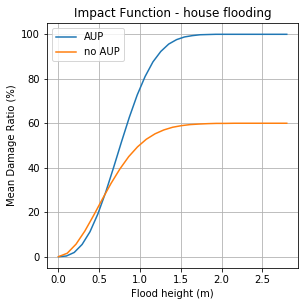

In [14]:
ent = load_entity()
fig = flooding_aup_if(ent.impact_funcs)
fig.savefig('if_house.png', format='png', bbox_inches='tight')